In [1]:
# ! cta-data get cta/users/gitlab_ctao_volodymyr_savchenko//reports --recursive

import glob

In [3]:
import json
import pandas as pd

d = []
for j in glob.glob('cta/users/gitlab_ctao_volodymyr_savchenko/reports/noir6/*.json'):
    d.append(json.load(open(j)))

d = pd.DataFrame(d)
d.sort_values('nproc', inplace=True)

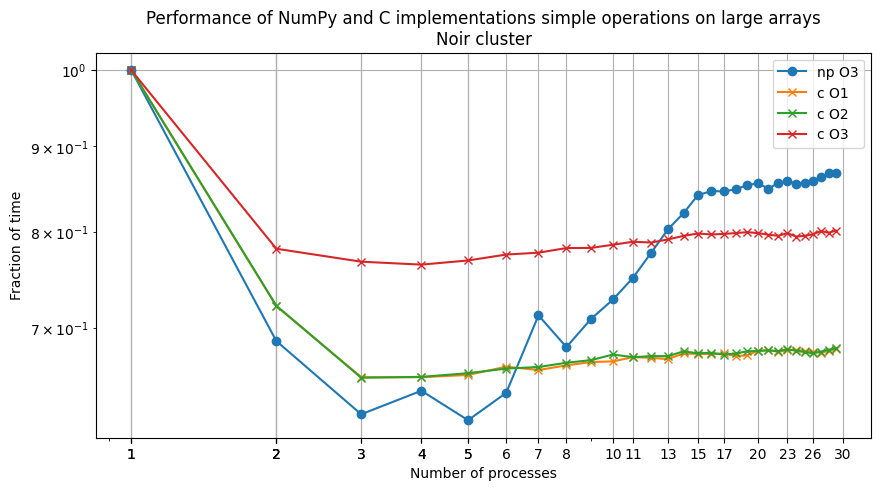

In [29]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

markers = ['o', 'x']
color_by_opt = {}

for version in d.version.unique():
    marker = markers.pop(0)
    for opt in d.optimization.unique():
        if opt == 'O0':
            continue

        _d = d[(d.version == version) & (d.optimization == opt)]

        if len(_d) == 0:
            continue

        if opt not in color_by_opt:
            color = None

        color_by_opt[opt] = plt.plot(
            _d.nproc,
            _d.total_time  / _d.total_time[_d.nproc == 1].values[0],
            label=version + ' ' + opt,
            marker=marker,
            color=color,
        )[0].get_color()



plt.legend()

plt.grid()

plt.loglog()


xticks = np.round(np.logspace(0, np.log10(30), 25)).astype(int)
plt.gca().set_xticks(xticks)
_ = plt.gca().set_xticklabels(xticks)

# yticks = np.round(np.logspace(-1.1, 0.1, 15), 1)
# plt.gca().set_yticks(yticks)
# _ = plt.gca().set_yticklabels(yticks)


# plt.ylim(0.09, 1.2)


plt.xlabel('Number of processes')
plt.ylabel('Fraction of time')

plt.title('Performance of NumPy and C implementations simple operations on large arrays\nNoir cluster')

plt.savefig('noir.png', dpi=300)

In [26]:
_d

,nproc,ntask,version,total_time,times,name,optimization
